# カロス語におけるn-gram

In [1]:
using Base.Iterators
ngram(s, n) = collect(zip((drop(s, k) for k = 0:n-1)...))

ngram (generic function with 1 method)

## bi-gramの作成

In [2]:
using CSV, DataFrames
tweets = DataFrame(CSV.File("tweets.csv"))
all_text = join(tweets[!, :Text], " ")
text = replace(lowercase.(all_text), r"@[0-9A-Z_a-z]+\W?|[\r\n!-@\[-`{-~]" => s"")
words = split(text)
pairs = ngram(words, 2)

16507-element Vector{Tuple{SubString{String}, SubString{String}}}:
 ("tava", "vuu")
 ("vuu", "wuxukuztamponre")
 ("wuxukuztamponre", "devo")
 ("devo", "zew")
 ("zew", "zub")
 ("zub", "nuv")
 ("nuv", "wamzec")
 ("wamzec", "tuj")
 ("tuj", "nuyutu")
 ("nuyutu", "legseyyopzix")
 ("legseyyopzix", "wifo")
 ("wifo", "yoj")
 ("yoj", "lib")
 ⋮
 ("pu", "qa")
 ("qa", "abfiy")
 ("abfiy", "yopat")
 ("yopat", "yui")
 ("yui", "yeu")
 ("yeu", "hikkumonlo")
 ("hikkumonlo", "po")
 ("po", "hovhuo")
 ("hovhuo", "lucaekouveqwa")
 ("lucaekouveqwa", "ij")
 ("ij", "nuatuysi")
 ("nuatuysi", "giw")

## bi-gramの頻度分析

In [3]:
using StatsBase
bigram_counter = StatsBase.countmap(pairs)
sorted_bigram_counter = sort(collect(bigram_counter), by=x->x[2], rev=true)

16495-element Vector{Pair{Tuple{SubString{String}, SubString{String}}, Int64}}:
                   ("sa", "sa") => 2
                  ("suf", "di") => 2
                   ("ni", "mo") => 2
                   ("le", "no") => 2
                   ("do", "su") => 2
                   ("na", "pi") => 2
                   ("se", "ru") => 2
                   ("yo", "ko") => 2
                  ("po", "tod") => 2
                   ("ru", "yi") => 2
                   ("bo", "ne") => 2
                   ("ji", "ta") => 2
                 ("yop", "lec") => 1
                                ⋮
        ("mehwocxeqcec", "vuw") => 1
     ("xuhexjazjejnume", "goq") => 1
                 ("juz", "yov") => 1
               ("tajuv", "sah") => 1
        ("caikirfehgoc", "sux") => 1
                ("ke", "rabud") => 1
               ("kuati", "sur") => 1
 ("qirrifocumjo", "mexoqeqpol") => 1
               ("qag", "xolha") => 1
             ("i", "fuhzejcae") => 1
              ("nao", "tazweb") => 

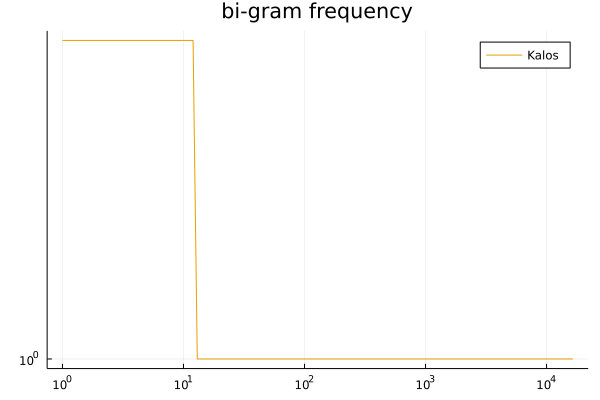

┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/n4I4Q/src/ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/n4I4Q/src/ticks.jl:295


In [7]:
using Plots
plot(map(x -> x[2], sorted_bigram_counter), xaxis=:log, yaxis=:log, title="bi-gram frequency", label="Kalos", color=RGB(230 / 255, 159 / 255, 0 / 255))